# Average Global Analysis 

---
### Import Dependencies and Setup

In [1]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import hvplot.pandas
from pathlib import Path
from pprint import pprint
from citipy import citipy

### Load the CSV file 

In [2]:
csv_file = Path("Resources/global_historical_temps.csv")
temp_data = pd.read_csv(csv_file,low_memory=False)

# Display sample data
temp_data.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.18,-0.25,-0.09,-0.16,-0.10,-0.21,-0.18,-0.1,-0.15,-0.24,-0.22,-0.18,-0.17,***,***,-0.12,-0.17,-0.2
1,1881,-0.20,-0.14,0.03,0.05,0.06,-0.19,0.00,-0.04,-0.15,-0.22,-0.19,-0.07,-0.09,-0.1,-0.17,0.04,-0.08,-0.19
2,1882,0.16,0.14,0.04,-0.17,-0.15,-0.23,-0.17,-0.07,-0.15,-0.24,-0.17,-0.36,-0.11,-0.09,0.07,-0.09,-0.16,-0.18
3,1883,-0.29,-0.37,-0.12,-0.18,-0.18,-0.08,-0.07,-0.14,-0.22,-0.11,-0.23,-0.11,-0.18,-0.2,-0.34,-0.16,-0.1,-0.19
4,1884,-0.13,-0.08,-0.36,-0.40,-0.34,-0.36,-0.30,-0.28,-0.27,-0.25,-0.34,-0.31,-0.29,-0.27,-0.11,-0.37,-0.31,-0.29


----------------
## Clean dataset

<strong>The sections of code in this section are as follows:</strong>

1. Rename certain columnsfor readability
2. Delete rows of years we don't need
3. Print new DataFrame to reflect this code

In [3]:
# Rename columns containing USD to remove ' symbol as it interfers with the code
temp_data = temp_data.rename(columns={"J-D": "Year Average", "DJF": "Dec/Jan/Feb (Summer)", "MAM": "Mar/Apr/May (Autumn)",
                                             "JJA": "Jun/Jul/Aug (Winter)", "SON": "Sep/Oct/Nov (Spring)"})

# Delete unwanted columns but maintain original copy
temp_data = temp_data.drop(columns=['D-N'], inplace=False)

unwanted_temp_data = temp_data[(temp_data['Year'] < 1979) | (temp_data['Year'] > 2022)]
temp_data = temp_data.drop(unwanted_temp_data.index, axis=0)

temp_data = temp_data.astype({"Aug": "float", "Sep": "float", "Oct": "float", "Nov": "float", "Dec": "float",
                             "Year Average": "float", "Dec/Jan/Feb (Summer)": "float", "Jun/Jul/Aug (Winter)": "float", "Sep/Oct/Nov (Spring)": "float", })
#temp_data = temp_data.set_index('Year')
temp_data.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year Average,Dec/Jan/Feb (Summer),Mar/Apr/May (Autumn),Jun/Jul/Aug (Winter),Sep/Oct/Nov (Spring)
99,1979,0.09,-0.10,0.19,0.15,0.04,0.14,0.04,0.17,0.25,0.26,0.28,0.48,0.17,0.02,0.13,0.11,0.27
100,1980,0.30,0.39,0.30,0.30,0.35,0.21,0.22,0.19,0.21,0.13,0.30,0.22,0.26,0.39,0.32,0.20,0.21
101,1981,0.53,0.42,0.48,0.32,0.25,0.29,0.32,0.35,0.15,0.12,0.23,0.41,0.32,0.39,0.35,0.32,0.17
102,1982,0.05,0.15,0.03,0.15,0.18,0.06,0.15,0.04,0.14,0.13,0.18,0.43,0.14,0.20,0.12,0.08,0.15
103,1983,0.53,0.43,0.42,0.28,0.34,0.23,0.18,0.36,0.37,0.17,0.30,0.17,0.31,0.46,0.34,0.26,0.28


In [4]:
csv_file = Path("Resources/disasterdata.csv")
disaster_data = pd.read_csv(csv_file,low_memory=False)

# Display sample data
unwanted_disaster_data = disaster_data[(disaster_data['Year'] > 2022)]
disaster_data = disaster_data.drop(unwanted_disaster_data.index, axis=0)

disaster_data = disaster_data.drop(columns=['Unnamed: 0', 'Disaster Subgroup', 'ISO', 'Continent', 'Latitude', 'Longitude', 'Start Month', 'Start Day', 'Total Deaths'])
disaster_data.head()

,Disaster Number,Year,Disaster Group,Disaster Type,Country,Region
0,1979-0094-GTM,1979,Natural,Earthquake,Guatemala,Central America
1,1979-0113-COL,1979,Natural,Earthquake,Colombia,South America
2,1979-9200-HKG,1979,Natural,Drought,Hong Kong,Eastern Asia
3,1979-0185-AIA,1979,Natural,Storm,Anguilla,Caribbean
4,1979-0039-ALB,1979,Natural,Earthquake,Albania,Southern Europe


In [5]:
merged_df = pd.merge(temp_data, disaster_data, how='inner', on=('Year'))
merged_df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,...,Year Average,Dec/Jan/Feb (Summer),Mar/Apr/May (Autumn),Jun/Jul/Aug (Winter),Sep/Oct/Nov (Spring),Disaster Number,Disaster Group,Disaster Type,Country,Region
0,1979,0.09,-0.1,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.17,0.02,0.13,0.11,0.27,1979-0094-GTM,Natural,Earthquake,Guatemala,Central America
1,1979,0.09,-0.1,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.17,0.02,0.13,0.11,0.27,1979-0113-COL,Natural,Earthquake,Colombia,South America
2,1979,0.09,-0.1,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.17,0.02,0.13,0.11,0.27,1979-9200-HKG,Natural,Drought,Hong Kong,Eastern Asia
3,1979,0.09,-0.1,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.17,0.02,0.13,0.11,0.27,1979-0185-AIA,Natural,Storm,Anguilla,Caribbean
4,1979,0.09,-0.1,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.17,0.02,0.13,0.11,0.27,1979-0039-ALB,Natural,Earthquake,Albania,Southern Europe


In [6]:
disaster_types = merged_df.groupby(['Disaster Type']).count()
disaster_types.index

Index(['Animal accident', 'Complex Disasters', 'Drought', 'Earthquake',
       'Epidemic', 'Extreme temperature', 'Flood', 'Glacial lake outburst',
       'Impact', 'Industrial accident', 'Insect infestation', 'Landslide',
       'Mass movement (dry)', 'Miscellaneous accident', 'Storm',
       'Transport accident', 'Volcanic activity', 'Wildfire'],
      dtype='object', name='Disaster Type')

In [7]:
# plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
# plt.plot(merged_df['Year'],merged_df['Year Average'], marker='o', linestyle='-')

# # Add labels and title
# plt.xlabel('Year')
# plt.ylabel('Global Average Temperature')
# plt.title('Global Average Temperature vs. Time')

# # Rotate x-axis labels for better readability
# plt.xticks(rotation=45)

# # Show the plot
# plt.grid(True)
# plt.tight_layout()
# plt.show()

In [8]:
# disaster_graph_data = merged_df.groupby(['Year']).count()['Disaster Number']

# plt.figure(figsize=(12, 6))
# plt.plot(disaster_graph_data, marker='o', linestyle='-')

# # Add labels and title
# plt.xlabel('Year')
# plt.ylabel('Number of Disasters')
# plt.title('Number of Disasters vs. Time')

# # Rotate x-axis labels for better readability
# plt.xticks(rotation=45)

# # Show the plot
# plt.grid(True)
# plt.tight_layout()
# plt.show()

# Overall Disasters

In [9]:
no_disasters = merged_df.groupby(['Year']).count()['Disaster Number']
#no_disasters
average_temp = merged_df.groupby(['Year']).mean()['Year Average']
#average_temp

C:\Users\admin\AppData\Local\Temp\ipykernel_9112\2021757786.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_temp = merged_df.groupby(['Year']).mean()['Year Average']


Text(0, 0.5, 'Temp (C)')

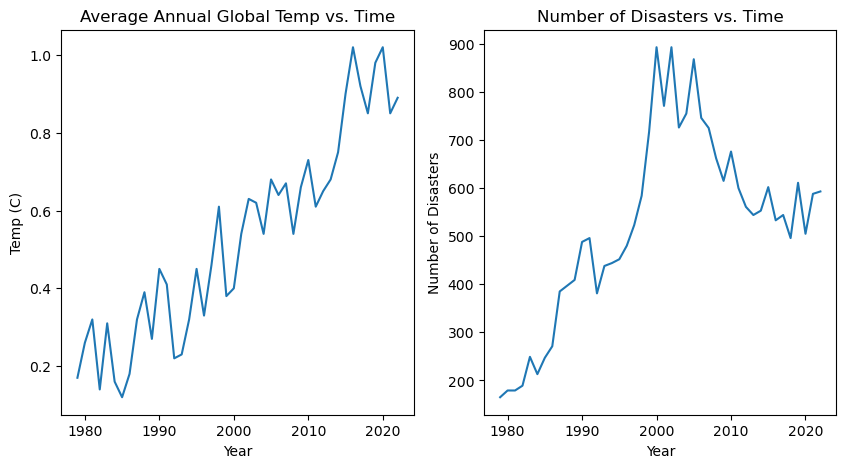

In [10]:
disaster_plot_data = no_disasters
temp_plot_data = average_temp

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(10,5))
ax1 = disaster_plot_data.plot(ax=axes[1])
#ax2 = ax1.twinx()
ax2 = temp_plot_data.plot(ax=axes[0])
ax1.title.set_text('Number of Disasters vs. Time')
ax2.title.set_text('Average Annual Global Temp vs. Time')
ax1.set_ylabel('Number of Disasters')
ax2.set_ylabel('Temp (C)')

The r-value is 0.57


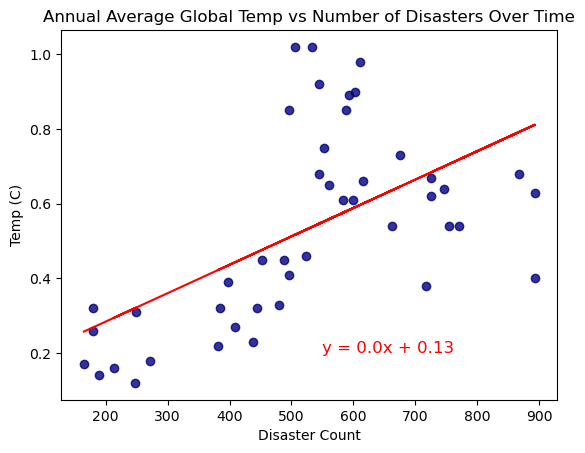

In [11]:
plt.scatter(no_disasters, average_temp, marker='o', color='navy', alpha=0.8)
x_values = no_disasters
y_values =  average_temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
# Incorporate the other graph properties
plt.xlabel('Disaster Count')
plt.ylabel('Temp (C)')
plt.title('Annual Average Global Temp vs Number of Disasters Over Time')
print(f"The r-value is {round(rvalue,2)}")

# Show plot
plt.annotate(line_eq, (550, 0.2), fontsize=12, color='red')
plt.show()

# Floods

In [12]:
flood_df = merged_df[merged_df['Disaster Type'] == 'Flood']
flood_df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,...,Year Average,Dec/Jan/Feb (Summer),Mar/Apr/May (Autumn),Jun/Jul/Aug (Winter),Sep/Oct/Nov (Spring),Disaster Number,Disaster Group,Disaster Type,Country,Region
5,1979,0.09,-0.1,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.17,0.02,0.13,0.11,0.27,1979-0044-ARG,Natural,Flood,Argentina,South America
13,1979,0.09,-0.1,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.17,0.02,0.13,0.11,0.27,1979-0109-BLZ,Natural,Flood,Belize,Central America
15,1979,0.09,-0.1,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.17,0.02,0.13,0.11,0.27,1979-0003-BRA,Natural,Flood,Brazil,South America
20,1979,0.09,-0.1,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.17,0.02,0.13,0.11,0.27,1979-0195-CAN,Natural,Flood,Canada,Northern America
28,1979,0.09,-0.1,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.17,0.02,0.13,0.11,0.27,1979-0099-COL,Natural,Flood,Colombia,South America


In [13]:
no_floods = flood_df.groupby(['Year']).count()['Disaster Number']
#no_floods
average_temp = flood_df.groupby(['Year']).mean()['Year Average']
#average_temp

C:\Users\admin\AppData\Local\Temp\ipykernel_9112\2838722683.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_temp = flood_df.groupby(['Year']).mean()['Year Average']


Text(0, 0.5, 'Temp (C)')

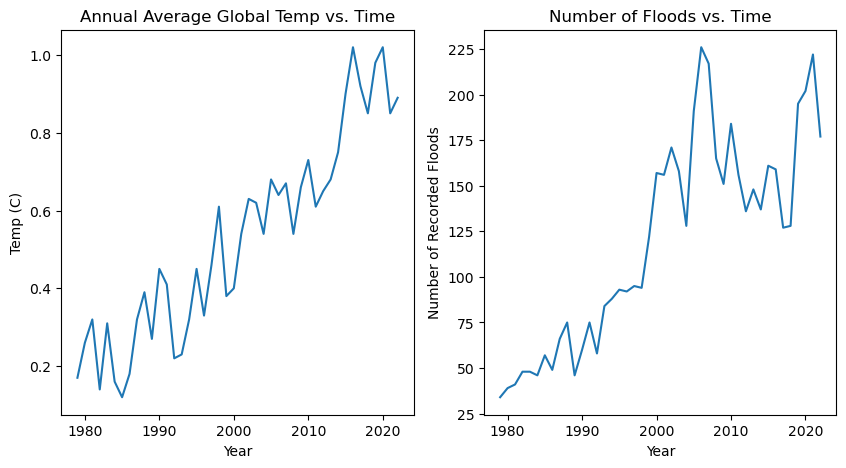

In [14]:
flood_plot_data = no_floods
temp_plot_data = average_temp

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(10,5))
#ax2=ax.twinx()
ax1 = flood_plot_data.plot(ax=axes[1])
ax2 = temp_plot_data.plot(ax=axes[0])
ax1.title.set_text('Number of Floods vs. Time')
ax2.title.set_text('Annual Average Global Temp vs. Time')
ax1.set_ylabel('Number of Recorded Floods')
ax2.set_ylabel('Temp (C)')

The r-value is 0.81


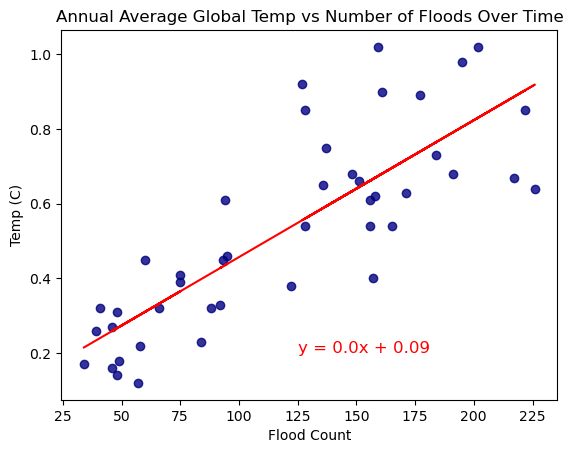

In [44]:
plt.scatter(no_floods, average_temp, marker='o', color='navy', alpha=0.8)
x_values = no_floods
y_values =  average_temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
# Incorporate the other graph properties
plt.xlabel('Flood Count')
plt.ylabel('Temp (C)')
plt.title('Annual Average Global Temp vs Number of Floods Over Time')
print(f"The r-value is {round(rvalue,2)}")

# Show plot
plt.annotate(line_eq, (125, 0.2), fontsize=12, color='red')
plt.show()

# Earthquakes

In [16]:
earthquake_df = merged_df[merged_df['Disaster Type'] == 'Earthquake']
earthquake_df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,...,Year Average,Dec/Jan/Feb (Summer),Mar/Apr/May (Autumn),Jun/Jul/Aug (Winter),Sep/Oct/Nov (Spring),Disaster Number,Disaster Group,Disaster Type,Country,Region
0,1979,0.09,-0.1,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.17,0.02,0.13,0.11,0.27,1979-0094-GTM,Natural,Earthquake,Guatemala,Central America
1,1979,0.09,-0.1,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.17,0.02,0.13,0.11,0.27,1979-0113-COL,Natural,Earthquake,Colombia,South America
4,1979,0.09,-0.1,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.17,0.02,0.13,0.11,0.27,1979-0039-ALB,Natural,Earthquake,Albania,Southern Europe
22,1979,0.09,-0.1,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.17,0.02,0.13,0.11,0.27,1979-0063-CHN,Natural,Earthquake,China,Eastern Asia
23,1979,0.09,-0.1,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.17,0.02,0.13,0.11,0.27,1979-0082-CHN,Natural,Earthquake,China,Eastern Asia


In [17]:
no_earthquakes = earthquake_df.groupby(['Year']).count()['Disaster Number']
#no_floods
average_temp = earthquake_df.groupby(['Year']).mean()['Year Average']
#average_temp

C:\Users\admin\AppData\Local\Temp\ipykernel_9112\1042733503.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_temp = earthquake_df.groupby(['Year']).mean()['Year Average']


Text(0, 0.5, 'Temp (C)')

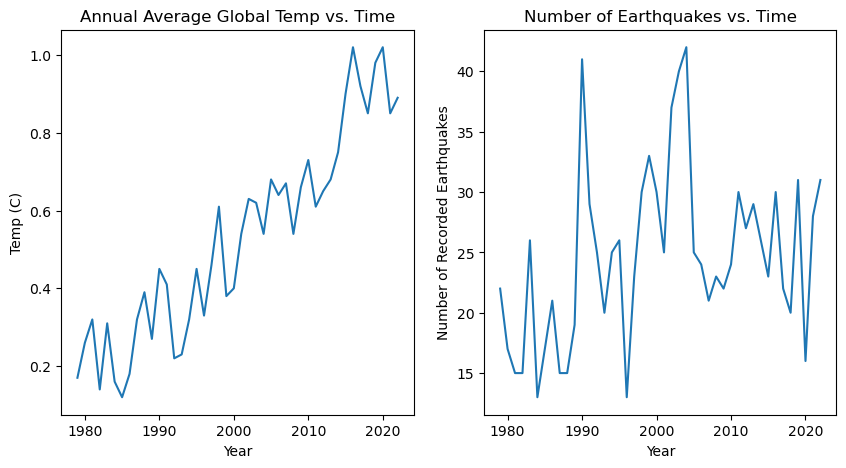

In [18]:
earthquake_plot_data = no_earthquakes
temp_plot_data = average_temp

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(10,5))
#ax2=ax.twinx()
ax1 = earthquake_plot_data.plot(ax=axes[1])
ax2 = temp_plot_data.plot(ax=axes[0])
ax1.title.set_text('Number of Earthquakes vs. Time')
ax2.title.set_text('Annual Average Global Temp vs. Time')
ax1.set_ylabel('Number of Recorded Earthquakes')
ax2.set_ylabel('Temp (C)')

The r-value is 0.34


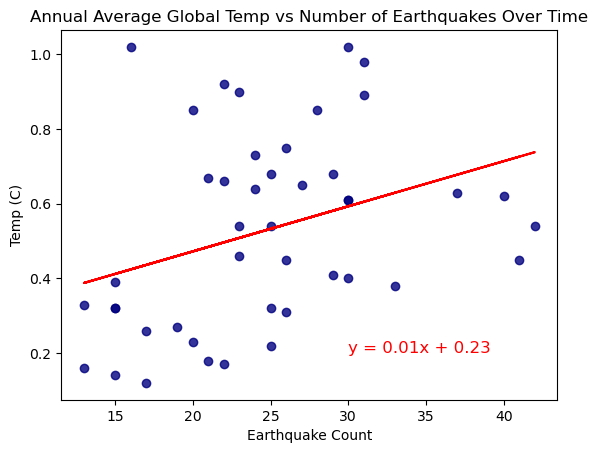

In [45]:
plt.scatter(no_earthquakes, average_temp, marker='o', color='navy', alpha=0.8)
x_values = no_earthquakes
y_values =  average_temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
# Incorporate the other graph properties
plt.xlabel('Earthquake Count')
plt.ylabel('Temp (C)')
plt.title('Annual Average Global Temp vs Number of Earthquakes Over Time')
print(f"The r-value is {round(rvalue,2)}")

# Show plot
plt.annotate(line_eq, (30, 0.2), fontsize=12, color='red')
plt.show()

# Storms

In [20]:
storm_df = merged_df[merged_df['Disaster Type'] == 'Storm']
storm_df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,...,Year Average,Dec/Jan/Feb (Summer),Mar/Apr/May (Autumn),Jun/Jul/Aug (Winter),Sep/Oct/Nov (Spring),Disaster Number,Disaster Group,Disaster Type,Country,Region
3,1979,0.09,-0.1,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.17,0.02,0.13,0.11,0.27,1979-0185-AIA,Natural,Storm,Anguilla,Caribbean
6,1979,0.09,-0.1,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.17,0.02,0.13,0.11,0.27,1979-0242-AUS,Natural,Storm,Australia,Australia and New Zealand
8,1979,0.09,-0.1,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.17,0.02,0.13,0.11,0.27,1979-0048-BGD,Natural,Storm,Bangladesh,Southern Asia
9,1979,0.09,-0.1,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.17,0.02,0.13,0.11,0.27,1979-0078-BGD,Natural,Storm,Bangladesh,Southern Asia
31,1979,0.09,-0.1,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.17,0.02,0.13,0.11,0.27,1979-0069-DMA,Natural,Storm,Dominica,Caribbean


In [21]:
no_storms = storm_df.groupby(['Year']).count()['Disaster Number']
#no_floods
average_temp = storm_df.groupby(['Year']).mean()['Year Average']
#average_temp

C:\Users\admin\AppData\Local\Temp\ipykernel_9112\1095656410.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_temp = storm_df.groupby(['Year']).mean()['Year Average']


Text(0, 0.5, 'Temp (C)')

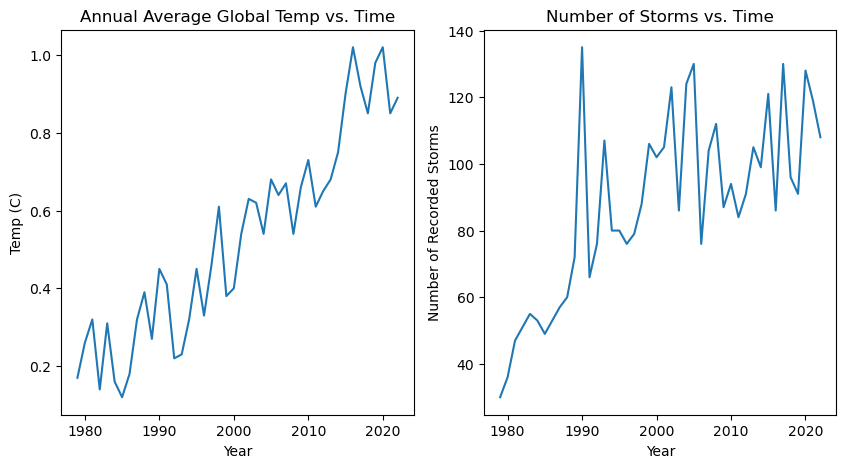

In [22]:
storm_plot_data = no_storms
temp_plot_data = average_temp

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(10,5))
#ax2=ax.twinx()
ax1 = storm_plot_data.plot(ax=axes[1])
ax2 = temp_plot_data.plot(ax=axes[0])
ax1.title.set_text('Number of Storms vs. Time')
ax2.title.set_text('Annual Average Global Temp vs. Time')
ax1.set_ylabel('Number of Recorded Storms')
ax2.set_ylabel('Temp (C)')

The r-value is 0.67


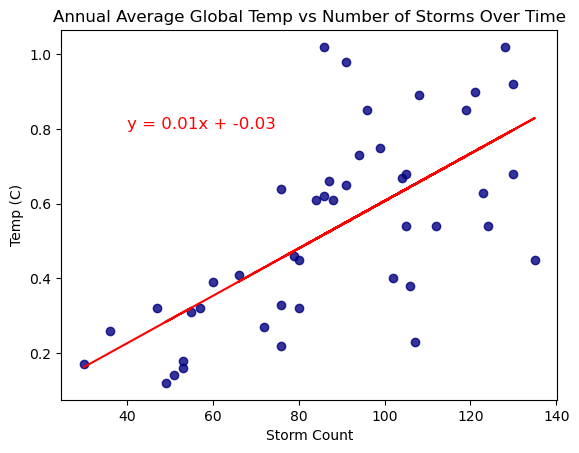

In [46]:
plt.scatter(no_storms, average_temp, marker='o', color='navy', alpha=0.8)
x_values = no_storms
y_values =  average_temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
# Incorporate the other graph properties
plt.xlabel('Storm Count')
plt.ylabel('Temp (C)')
plt.title('Annual Average Global Temp vs Number of Storms Over Time')
print(f"The r-value is {round(rvalue,2)}")

# Show plot
plt.annotate(line_eq, (40, 0.8), fontsize=12, color='red')
plt.show()

# Wildfires

In [24]:
wildfire_df = merged_df[merged_df['Disaster Type'] == 'Wildfire']
wildfire_df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,...,Year Average,Dec/Jan/Feb (Summer),Mar/Apr/May (Autumn),Jun/Jul/Aug (Winter),Sep/Oct/Nov (Spring),Disaster Number,Disaster Group,Disaster Type,Country,Region
97,1979,0.09,-0.10,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.17,0.02,0.13,0.11,0.27,1979-0023-MMR,Natural,Wildfire,Myanmar,South-Eastern Asia
183,1980,0.30,0.39,0.30,0.30,0.35,0.21,0.22,0.19,0.21,...,0.26,0.39,0.32,0.20,0.21,1980-0211-CAN,Natural,Wildfire,Canada,Northern America
370,1981,0.53,0.42,0.48,0.32,0.25,0.29,0.32,0.35,0.15,...,0.32,0.39,0.35,0.32,0.17,1981-0233-CHN,Natural,Wildfire,China,Eastern Asia
447,1981,0.53,0.42,0.48,0.32,0.25,0.29,0.32,0.35,0.15,...,0.32,0.39,0.35,0.32,0.17,1981-0045-MMR,Natural,Wildfire,Myanmar,South-Eastern Asia
572,1982,0.05,0.15,0.03,0.15,0.18,0.06,0.15,0.04,0.14,...,0.14,0.20,0.12,0.08,0.15,1982-0304-FRA,Natural,Wildfire,France,Western Europe


In [25]:
no_wildfires = wildfire_df.groupby(['Year']).count()['Disaster Number']
#no_floods
average_temp = wildfire_df.groupby(['Year']).mean()['Year Average']
#average_temp

C:\Users\admin\AppData\Local\Temp\ipykernel_9112\2973139078.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_temp = wildfire_df.groupby(['Year']).mean()['Year Average']


Text(0, 0.5, 'Temp (C)')

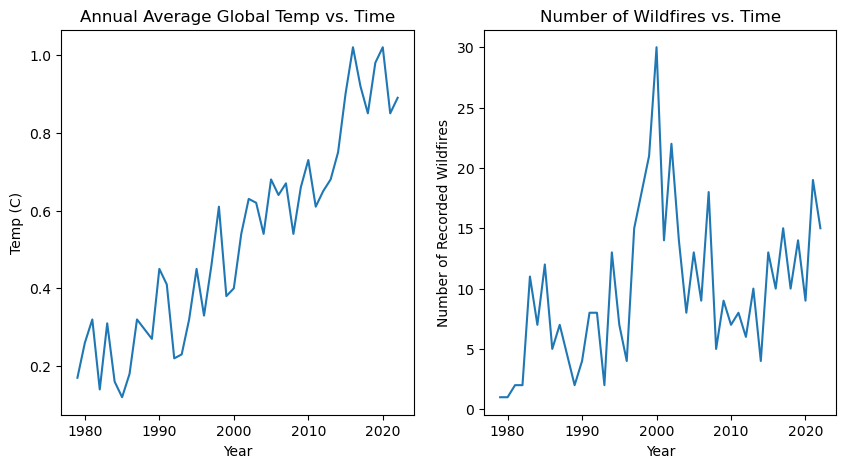

In [26]:
wildfire_plot_data = no_wildfires
temp_plot_data = average_temp

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(10,5))
#ax2=ax.twinx()
ax1 = wildfire_plot_data.plot(ax=axes[1])
ax2 = temp_plot_data.plot(ax=axes[0])
ax1.title.set_text('Number of Wildfires vs. Time')
ax2.title.set_text('Annual Average Global Temp vs. Time')
ax1.set_ylabel('Number of Recorded Wildfires')
ax2.set_ylabel('Temp (C)')

The r-value is 0.36


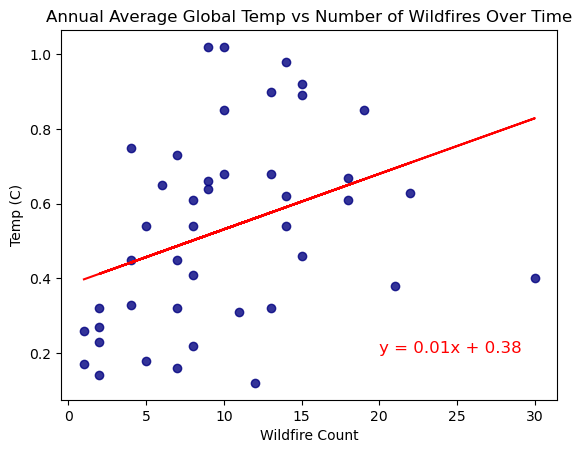

In [27]:
plt.scatter(no_wildfires, average_temp, marker='o', color='navy', alpha=0.8)
x_values = no_wildfires
y_values = average_temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
# Incorporate the other graph properties
plt.xlabel('Wildfire Count')
plt.ylabel('Temp (C)')
plt.title('Annual Average Global Temp vs Number of Wildfires Over Time')
print(f"The r-value is {round(rvalue,2)}")

# Show plot
plt.annotate(line_eq, (20, 0.2), fontsize=12, color='red')
plt.show()

# Volcanic Activity

In [28]:
volcano_df = merged_df[merged_df['Disaster Type'] == 'Volcanic activity']
volcano_df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,...,Year Average,Dec/Jan/Feb (Summer),Mar/Apr/May (Autumn),Jun/Jul/Aug (Winter),Sep/Oct/Nov (Spring),Disaster Number,Disaster Group,Disaster Type,Country,Region
57,1979,0.09,-0.10,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.17,0.02,0.13,0.11,0.27,1979-0027-IDN,Natural,Volcanic activity,Indonesia,South-Eastern Asia
58,1979,0.09,-0.10,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.17,0.02,0.13,0.11,0.27,1979-0269-IDN,Natural,Volcanic activity,Indonesia,South-Eastern Asia
86,1979,0.09,-0.10,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.17,0.02,0.13,0.11,0.27,1979-0087-ITA,Natural,Volcanic activity,Italy,Southern Europe
158,1979,0.09,-0.10,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.17,0.02,0.13,0.11,0.27,1979-0035-VCT,Natural,Volcanic activity,Saint Vincent and the Grenadines,Caribbean
223,1980,0.30,0.39,0.30,0.30,0.35,0.21,0.22,0.19,0.21,...,0.26,0.39,0.32,0.20,0.21,1980-0317-IDN,Natural,Volcanic activity,Indonesia,South-Eastern Asia


In [29]:
no_volcanos = volcano_df.groupby(['Year']).count()['Disaster Number']
#no_floods
average_temp = volcano_df.groupby(['Year']).mean()['Year Average']
#average_temp

C:\Users\admin\AppData\Local\Temp\ipykernel_9112\1044040848.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_temp = volcano_df.groupby(['Year']).mean()['Year Average']


Text(0, 0.5, 'Temp (C)')

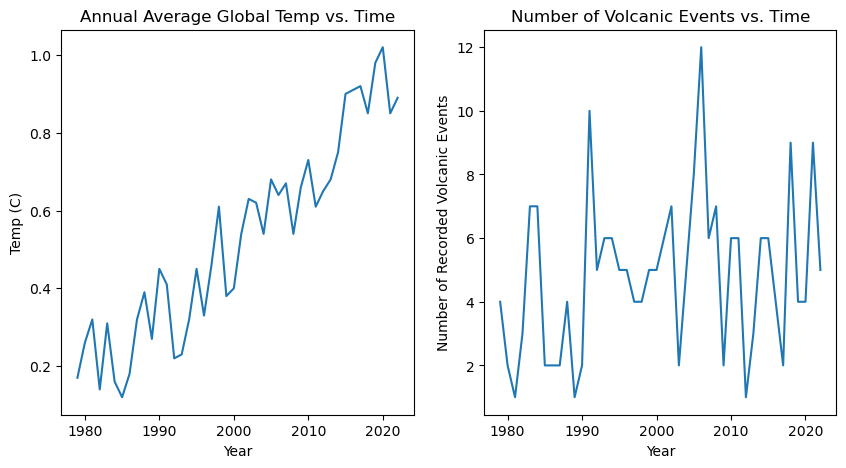

In [30]:
volcano_plot_data = no_volcanos
temp_plot_data = average_temp

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(10,5))
#ax2=ax.twinx()
ax1 = volcano_plot_data.plot(ax=axes[1])
ax2 = temp_plot_data.plot(ax=axes[0])
ax1.title.set_text('Number of Volcanic Events vs. Time')
ax2.title.set_text('Annual Average Global Temp vs. Time')
ax1.set_ylabel('Number of Recorded Volcanic Events')
ax2.set_ylabel('Temp (C)')

The r-value is 0.23


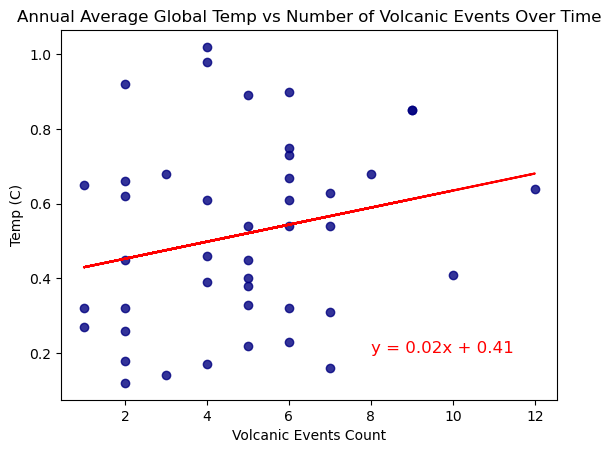

In [31]:
plt.scatter(no_volcanos, average_temp, marker='o', color='navy', alpha=0.8)
x_values = no_volcanos
y_values =  average_temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
# Incorporate the other graph properties
plt.xlabel('Volcanic Events Count')
plt.ylabel('Temp (C)')
plt.title('Annual Average Global Temp vs Number of Volcanic Events Over Time')
print(f"The r-value is {round(rvalue,2)}")

# Show plot
plt.annotate(line_eq, (8, 0.2), fontsize=12, color='red')
plt.show()

# Landslides

In [32]:
landslide_df = merged_df[merged_df['Disaster Type'] == 'Landslide']
landslide_df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,...,Year Average,Dec/Jan/Feb (Summer),Mar/Apr/May (Autumn),Jun/Jul/Aug (Winter),Sep/Oct/Nov (Spring),Disaster Number,Disaster Group,Disaster Type,Country,Region
21,1979,0.09,-0.1,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.17,0.02,0.13,0.11,0.27,1979-0247-CHL,Natural,Landslide,Chile,South America
45,1979,0.09,-0.1,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.17,0.02,0.13,0.11,0.27,1979-0206-HKG,Natural,Landslide,Hong Kong,Eastern Asia
59,1979,0.09,-0.1,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.17,0.02,0.13,0.11,0.27,1979-0262-IDN,Natural,Landslide,Indonesia,South-Eastern Asia
64,1979,0.09,-0.1,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.17,0.02,0.13,0.11,0.27,1979-0030-IND,Natural,Landslide,India,Southern Asia
65,1979,0.09,-0.1,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.17,0.02,0.13,0.11,0.27,1979-0079-IND,Natural,Landslide,India,Southern Asia


In [33]:
no_landslides = landslide_df.groupby(['Year']).count()['Disaster Number']
#no_floods
average_temp = landslide_df.groupby(['Year']).mean()['Year Average']
#average_temp

C:\Users\admin\AppData\Local\Temp\ipykernel_9112\320670103.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_temp = landslide_df.groupby(['Year']).mean()['Year Average']


Text(0, 0.5, 'Temp (C)')

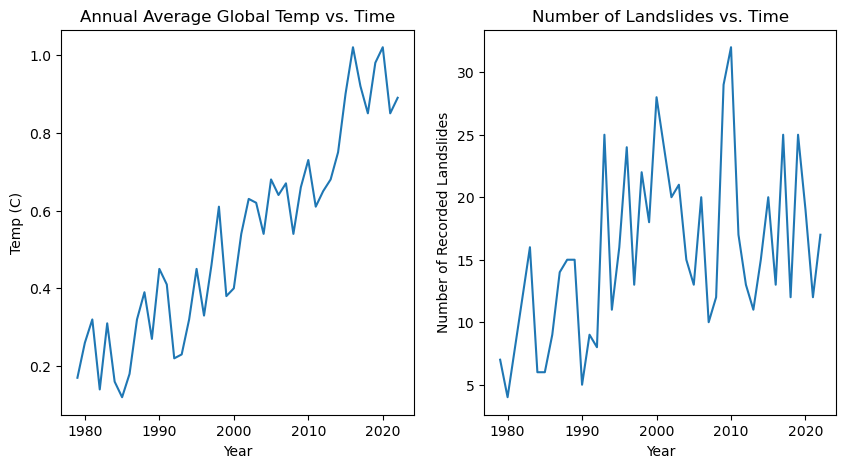

In [34]:
landslide_plot_data = no_landslides
temp_plot_data = average_temp

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(10,5))
#ax2=ax.twinx()
ax1 = landslide_plot_data.plot(ax=axes[1])
ax2 = temp_plot_data.plot(ax=axes[0])
ax1.title.set_text('Number of Landslides vs. Time')
ax2.title.set_text('Annual Average Global Temp vs. Time')
ax1.set_ylabel('Number of Recorded Landslides')
ax2.set_ylabel('Temp (C)')

The r-value is 0.41


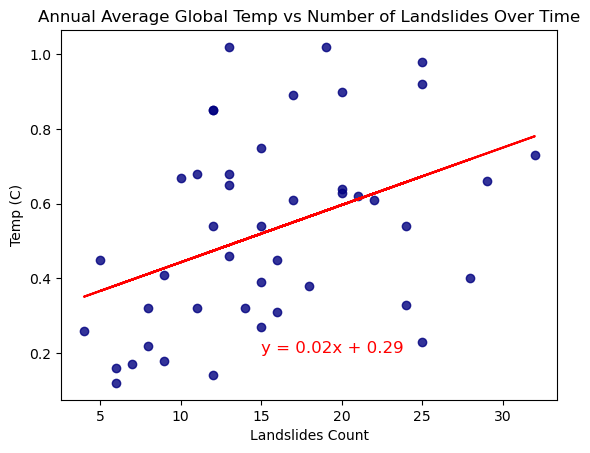

In [35]:
plt.scatter(no_landslides, average_temp, marker='o', color='navy', alpha=0.8)
x_values = no_landslides
y_values =  average_temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
# Incorporate the other graph properties
plt.xlabel('Landslides Count')
plt.ylabel('Temp (C)')
plt.title('Annual Average Global Temp vs Number of Landslides Over Time')
print(f"The r-value is {round(rvalue,2)}")

# Show plot
plt.annotate(line_eq, (15, 0.2), fontsize=12, color='red')
plt.show()

# Drought

In [36]:
drought_df = merged_df[merged_df['Disaster Type'] == 'Drought']
drought_df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,...,Year Average,Dec/Jan/Feb (Summer),Mar/Apr/May (Autumn),Jun/Jul/Aug (Winter),Sep/Oct/Nov (Spring),Disaster Number,Disaster Group,Disaster Type,Country,Region
2,1979,0.09,-0.1,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.17,0.02,0.13,0.11,0.27,1979-9200-HKG,Natural,Drought,Hong Kong,Eastern Asia
12,1979,0.09,-0.1,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.17,0.02,0.13,0.11,0.27,1979-9270-BGD,Natural,Drought,Bangladesh,Southern Asia
14,1979,0.09,-0.1,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.17,0.02,0.13,0.11,0.27,1979-9012-BRA,Natural,Drought,Brazil,South America
26,1979,0.09,-0.1,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.17,0.02,0.13,0.11,0.27,1979-9004-CHN,Natural,Drought,China,Eastern Asia
50,1979,0.09,-0.1,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.17,0.02,0.13,0.11,0.27,1979-9177-KEN,Natural,Drought,Kenya,Eastern Africa


In [37]:
no_droughts = drought_df.groupby(['Year']).count()['Disaster Number']
#no_floods
average_temp = drought_df.groupby(['Year']).mean()['Year Average']
#average_temp

C:\Users\admin\AppData\Local\Temp\ipykernel_9112\2040503219.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_temp = drought_df.groupby(['Year']).mean()['Year Average']


Text(0, 0.5, 'Temp (C)')

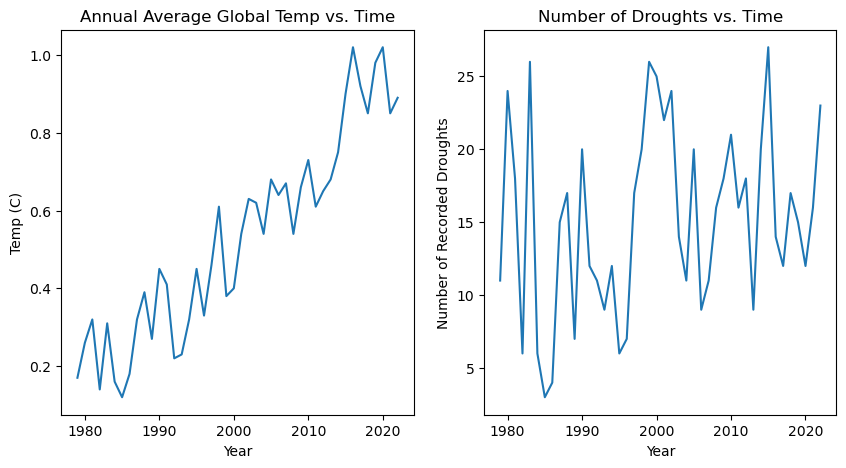

In [38]:
drought_plot_data = no_droughts
temp_plot_data = average_temp

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(10,5))
#ax2=ax.twinx()
ax1 = drought_plot_data.plot(ax=axes[1])
ax2 = temp_plot_data.plot(ax=axes[0])
ax1.title.set_text('Number of Droughts vs. Time')
ax2.title.set_text('Annual Average Global Temp vs. Time')
ax1.set_ylabel('Number of Recorded Droughts')
ax2.set_ylabel('Temp (C)')

The r-value is 0.34


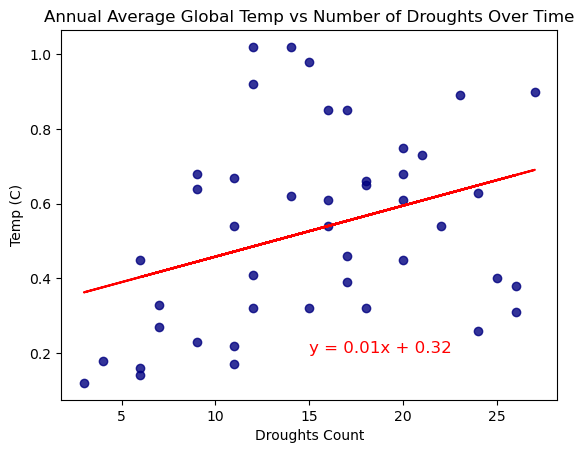

In [39]:
plt.scatter(no_droughts, average_temp, marker='o', color='navy', alpha=0.8)
x_values = no_droughts
y_values =  average_temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
# Incorporate the other graph properties
plt.xlabel('Droughts Count')
plt.ylabel('Temp (C)')
plt.title('Annual Average Global Temp vs Number of Droughts Over Time')
print(f"The r-value is {round(rvalue,2)}")

# Show plot
plt.annotate(line_eq, (15, 0.2), fontsize=12, color='red')
plt.show()

# Epidemic

In [40]:
epidemic_df = merged_df[merged_df['Disaster Type'] == 'Epidemic']
epidemic_df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,...,Year Average,Dec/Jan/Feb (Summer),Mar/Apr/May (Autumn),Jun/Jul/Aug (Winter),Sep/Oct/Nov (Spring),Disaster Number,Disaster Group,Disaster Type,Country,Region
7,1979,0.09,-0.10,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.17,0.02,0.13,0.11,0.27,1979-0020-BFA,Natural,Epidemic,Burkina Faso,Western Africa
69,1979,0.09,-0.10,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.17,0.02,0.13,0.11,0.27,1979-0266-IND,Natural,Epidemic,India,Southern Asia
96,1979,0.09,-0.10,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.17,0.02,0.13,0.11,0.27,1979-0002-MLI,Natural,Epidemic,Mali,Western Africa
204,1980,0.30,0.39,0.30,0.30,0.35,0.21,0.22,0.19,0.21,...,0.26,0.39,0.32,0.20,0.21,1980-0130-ETH,Natural,Epidemic,Ethiopia,Eastern Africa
233,1980,0.30,0.39,0.30,0.30,0.35,0.21,0.22,0.19,0.21,...,0.26,0.39,0.32,0.20,0.21,1980-0061-IND,Natural,Epidemic,India,Southern Asia


In [41]:
no_epidemics = epidemic_df.groupby(['Year']).count()['Disaster Number']
#no_floods
average_temp = epidemic_df.groupby(['Year']).mean()['Year Average']
#average_temp

C:\Users\admin\AppData\Local\Temp\ipykernel_9112\741771255.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_temp = epidemic_df.groupby(['Year']).mean()['Year Average']


Text(0, 0.5, 'Temp (C)')

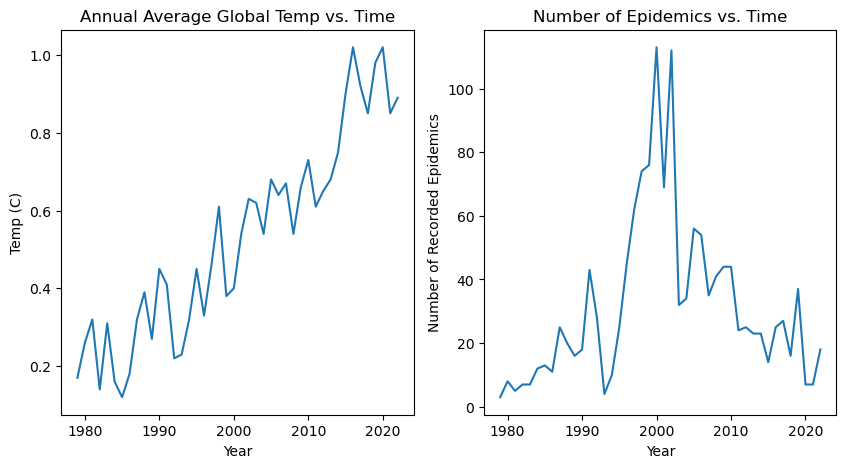

In [42]:
epidemic_plot_data = no_epidemics
temp_plot_data = average_temp

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(10,5))
#ax2=ax.twinx()
ax1 = epidemic_plot_data.plot(ax=axes[1])
ax2 = temp_plot_data.plot(ax=axes[0])
ax1.title.set_text('Number of Epidemics vs. Time')
ax2.title.set_text('Annual Average Global Temp vs. Time')
ax1.set_ylabel('Number of Recorded Epidemics')
ax2.set_ylabel('Temp (C)')

The r-value is 0.13


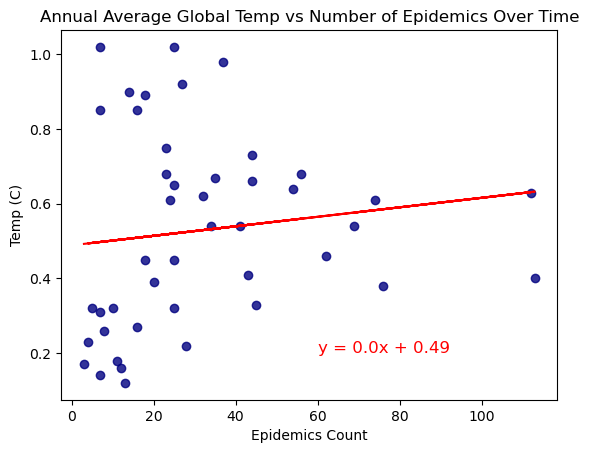

In [43]:
plt.scatter(no_epidemics, average_temp, marker='o', color='navy', alpha=0.8)
x_values = no_epidemics
y_values =  average_temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
# Incorporate the other graph properties
plt.xlabel('Epidemics Count')
plt.ylabel('Temp (C)')
plt.title('Annual Average Global Temp vs Number of Epidemics Over Time')
print(f"The r-value is {round(rvalue,2)}")

# Show plot
plt.annotate(line_eq, (60, 0.2), fontsize=12, color='red')
plt.show()